#Practical model fitting
Someone has given you  text file with concentration-time curves measured in an artery and in tumor tissue. This notebook demonstrates how such data can be analyzed with the compartment models library.

First, we need to import some libraries:

In [1]:
import numpy as np

# plotting and graphics settings
import matplotlib.pyplot as plt
%pylab inline

try:
    import seaborn as sns # pretty graphics. not strictly necessary.
    sns.set_context("notebook")
    sns.set_style("whitegrid")

except:
    pass # with less pretty graphics  

Populating the interactive namespace from numpy and matplotlib


We can then load the data from the text file and store each of the three columns as a vector:

In [2]:
time, curve, aif = np.loadtxt('tests/tumor.csv', delimiter=',', unpack=True, comments='#')

print time[0:5]
print curve[0:5]
print aif[0:5]

[ 0.         2.         4.0000001  6.0000001  8.0000001]
[ 0.03825918 -0.4702525  -1.93690696 -4.21724918 -2.56101234]
[ 0.01500034 -0.32475457 -0.35223727  0.47622458 -0.41048893]


This is not very enlightening. Of course, we can do better and plot the two curves.

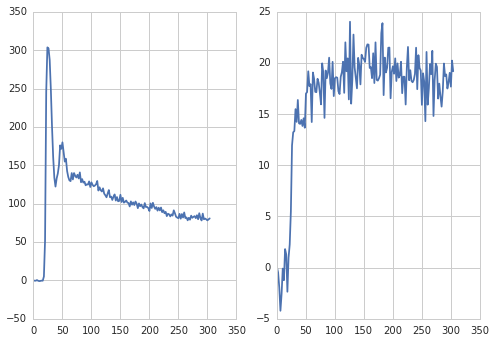

In [3]:
f, (a1,a2)=plt.subplots(1,2)
a1.plot(time, aif, label='AIF')
a2.plot(time,curve, label='Tissue curve')

This looks like  a pretty arterial input function (left) and a tissue curve (right).

# Tracer-kinetic analysis
To further analyze this data, we need a library for model fitting. Here, we use
https://github.com/michimichi/compartmentmodels. This particular library is currently under development, but in a usable status.


In [4]:
import compartmentmodels.compartmentmodels as CM

Experience tells that this curve needs to be fitted with a two-compartment exchange model:


In [5]:
twocx = CM.TwoCXModel(time, curve, aif, 
                      startdict={'Fp':20.0, 'vp': 5.5, 'PS':0.1, 've':9.1})
twocx.fit_model()

True

Let us examine the model fit:

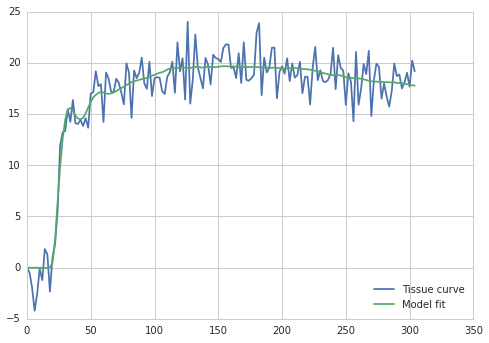

In [6]:
f, a = plt.subplots(1,1)
a.plot(time, curve, label='Tissue curve')
a.plot(time, twocx.fit, label='Model fit')
plt.legend(loc=4)

This fit produced the following parameters:

In [7]:
print twocx.phys_parameters

{'Fp': 50.426690251207553, 'PS': 7.7330909906693188, 'E': 0.13296286240329339, 've': 12.561175349066955, 'TP': 8.3937209264061128, 'vp': 8.13628288141906, 'Iterations': 46, 'TE': 97.460449108046149}


This concludes our quick demonstration of this library.